In [1]:
import numpy as np
import matplotlib.pyplot as plt

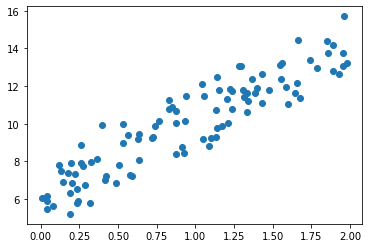

In [5]:
np.random.seed(0)

# y = 4x + 6 식을 근사 (w1=4, w0=6), random 값은 Noise를 위해 만듦

X = 2*np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# x,y 데이터 셋 scatter plot 으로 시각화
plt.figure(facecolor='w')
plt.scatter(X,y)

In [60]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환
def get_weight_update(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산ㅇ로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0를 업데이트할 w1_update, w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update=get_weight_update(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N #오차값
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print(f'w1:{w1[0,0]:.4f} w0:{w0[0,0]:.4f}')
y_pred = w1[0,0]*X +w0
print(f'Gradient Descent Total Cost : {get_cost(y, y_pred):.4f}')

w1:4.0218 w0:6.1620
Gradient Descent Total Cost : 0.9935


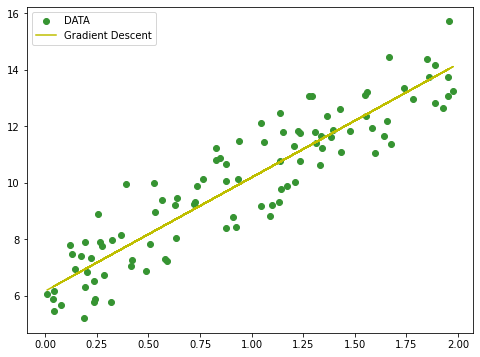

In [29]:
plt.figure(figsize = (8,6),facecolor='w')
plt.scatter(X,y, c = "#369432", label = 'DATA')
plt.plot(X, y_pred, c='y', label = 'Gradient Descent')

plt.legend()

In [43]:
# 샘플링으로 데이터를 추출하여 시간 단축
def stochastic_gradient_descent_steps(X,y, batch_size = 10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        #전체 x,y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_update(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [44]:
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [47]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print(f'w1:{round(w1[0,0],3)} w0:{round(w0[0,0],3)}')
y_pred = w1[0,0]*X + w0
print(f'Stochastic Gradient Descent Total Cost : {get_cost(y,y_pred):.4f}')

w1:4.028 w0:6.156
Stochastic Gradient Descent Total Cost : 0.9937


# sklearn.linear_model.LinearRegression
* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)

[79.6131561]


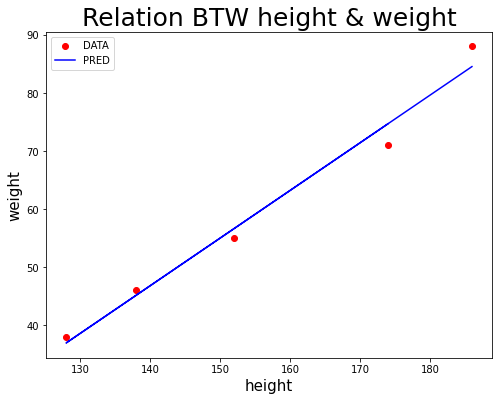

In [82]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = [[174], [152], [138], [128], [186]]
y = [71, 55, 46, 38, 88]
lr.fit(X,y)

print(lr.predict([[180]]))

# 학습 데이터와 y값을 산포도로 그린다
plt.figure(figsize=(8,6), facecolor='w')
plt.scatter(X, y, color ='r', label ='DATA')

# 학습데이터를 입력하여 예측값을 계산한다
y_pred = lr.predict(X)

# 학습된 데이터와 예측값으로 선 그래프로 그린다.
# 계산된 기울기와 y절편을 가지는 직선이 그려진다.
plt.xlabel('height', fontsize = 15)
plt.ylabel('weight', fontsize = 15)
plt.title('Relation BTW height & weight', fontsize = 25)
plt.plot(X,y_pred, color = 'blue', label = 'PRED')
plt.legend()